In [1]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [2]:
!pip install pystan
!pip install fbprophet

  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Usi

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Guide Info\AppData\Local\Temp\pip-install-lfxd6s9x\pystan_c6513e2c0449423bb0a099abeb1f6e9a\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.5-cp311-cp311-win_amd64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Us

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Guide Info\AppData\Local\Temp\pip-install-utdsxxb9\pystan_dcc3a8c32c944bb5a114b2878b00d552\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
from prophet import Prophet

# 1. Read in Data and Process Dates

In [20]:
df = pd.read_csv('dataset.csv')

In [21]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [22]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [8]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# 2. Train Model

In [23]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

17:15:50 - cmdstanpy - INFO - Chain [1] start processing
17:15:53 - cmdstanpy - INFO - Chain [1] done processing


# 3. Forecast Away

In [24]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,795.894147,3989.473239,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,813.182446,4002.211138,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,954.778749,3935.357510,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,958.595799,4013.964386,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,789.752207,4062.410774,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


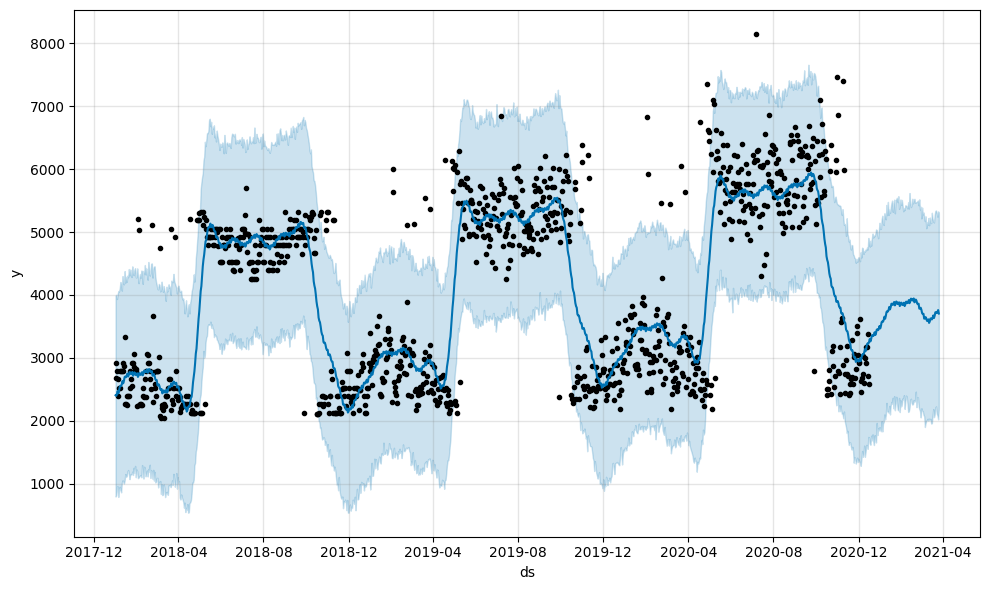

In [25]:
plot1 = m.plot(forecast)

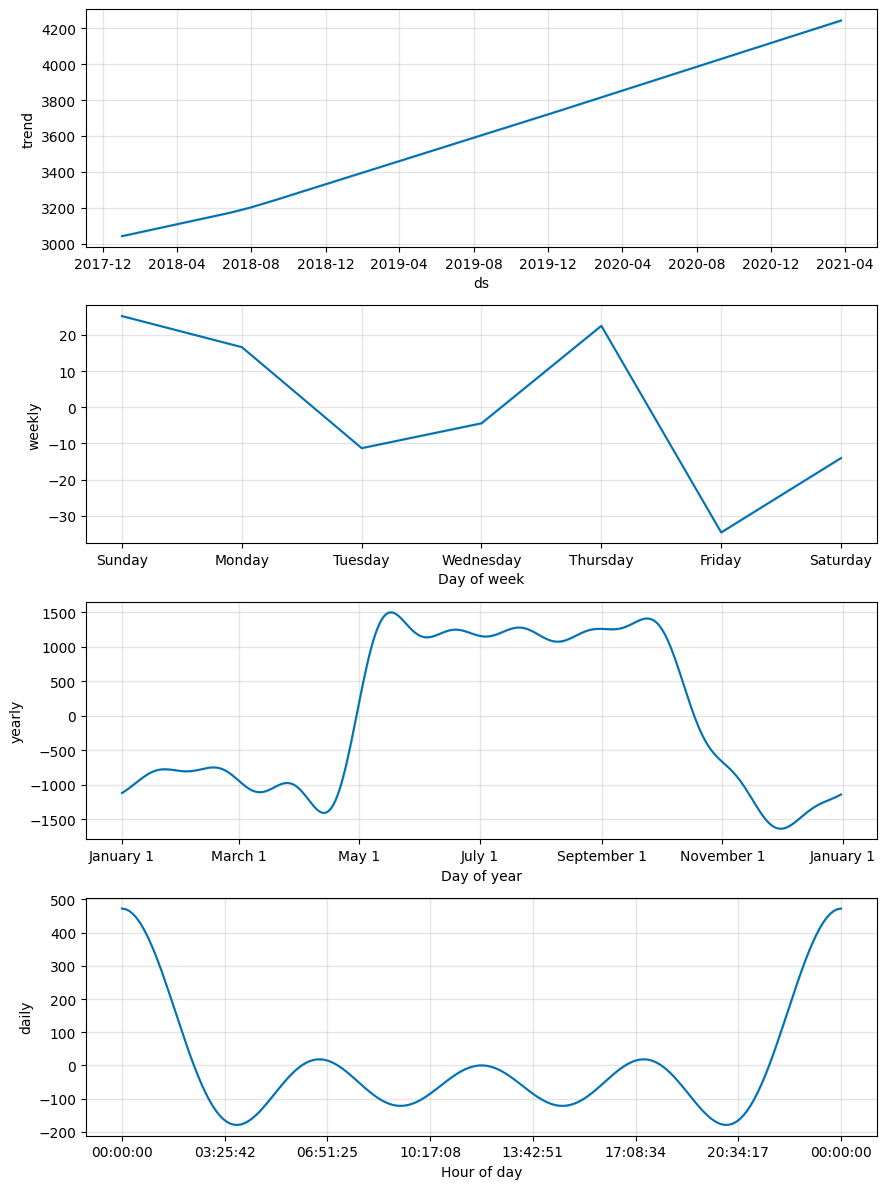

In [26]:
plt2 = m.plot_components(forecast)